<a href="https://colab.research.google.com/github/JulianaCarvajal/Spaceship_Titanic/blob/workOnPreprocess%2FBustamJos3/classConstructionPlayground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working from remote
Upload .py file and import class from it

In [1]:
# import experimentalIterator as ei # inactive for now, class test on cell
import pandas as pd #libraries
from zipfile import ZipFile
#call API
%pip install kaggle
#to upload kaggle token .json
from google.colab import files

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
files.upload()
#Make a directory named kaggle and copy the kaggle.json file there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# change the permission of the file
!chmod 600 ~/.kaggle/kaggle.json
# Import data files from the Kaggle API
!kaggle competitions download -c spaceship-titanic
#unzip files
file_name = "spaceship-titanic.zip" #the file is the dataset exact name
with ZipFile("spaceship-titanic.zip", 'r') as zip:
  zip.extractall()
  print('Done')
# .zip is now not necessary
!rm *.zip

Saving kaggle.json to kaggle.json
  0% 0.00/299k [00:00<?, ?B/s]
100% 299k/299k [00:00<00:00, 76.6MB/s]
Done


# End of working from remote

# Working from local

In [ ]:
import experimentalIterator as ei
from zipfile import ZipFile
#call API
%pip install kaggle

# End of working from local

# Testing of class

In [39]:
class experimentalIterator: # class construction

    from numpy import concatenate
    global concat
    concat=concatenate
    from sklearn.preprocessing import LabelEncoder #BustamJos3 preprocess  #convert categorical to numerical
    global labelEncoder
    labelEncoder=LabelEncoder()
    from sklearn.model_selection import train_test_split #BustamJos3 for models # import train_test split function
    global train_test
    train_test=train_test_split
    from sklearn.ensemble import RandomForestClassifier #import RandomForest
    global randomForestC
    randomForestC = RandomForestClassifier()
    from sklearn.tree import DecisionTreeClassifier
    global decisionTreeClassifier
    decisionTreeClassifier=DecisionTreeClassifier()
    
    def __init__(self, X, y):
        self._X = self.Prepocess_Spaceship_Titanic( X )#store as attribute X data of dataset
        self._y = labelEncoder.fit_transform(y.values) #to numeric
        self._preproX=0
        self._XTrain=0
        self._yTrain=0
        self._XTest=0
        self._yTest=0
        self._randomFC=randomForestC
        self._decisionTreeClassifier=decisionTreeClassifier
    
    def Prepocess_Spaceship_Titanic(self, d):
        for i in range(len(d)):
            if (d['HomePlanet'].isna()[i] == True and type(d['Cabin'][i])!= float):
                if d['Cabin'][i][0] in 'ABCT':
                    d.loc[i,'HomePlanet']='Europa'
                elif d['Cabin'][i][0] == 'G':
                    d.loc[i,'HomePlanet'] = 'Earth'
            elif (d['RoomService'].isna()[i]== True and d['CryoSleep'][i]==True) or (d['RoomService'].isna()[i]== True and d['Age'][i]<=12):
                d.loc[i,'RoomService']= float(0)
            elif (d['FoodCourt'].isna()[i]== True and d['CryoSleep'][i]==True) or (d['FoodCourt'].isna()[i]== True and d['Age'][i]<=12):
                d.loc[i,'FoodCourt']= float(0)   
            elif (d['ShoppingMall'].isna()[i]== True and d['CryoSleep'][i]==True) or (d['ShoppingMall'].isna()[i]== True and d['Age'][0]<=12):
                d.loc[i,'ShoppingMall']= float(0) 
            elif (d['Spa'].isna()[i]== True and d['CryoSleep'][i]==True) or (d['Spa'].isna()[i]== True and d['Age'][i]<=12):
                d.loc[i,'Spa']= float(0) 
            elif (d['VRDeck'].isna()[i]== True and d['CryoSleep'][i]==True) or (d['VRDeck'].isna()[i]== True and d['Age'][i]<=12):
                d.loc[i,'VRDeck']= float(0)
            elif d['CryoSleep'].isna()[i]== True and d['RoomService'][i]==float(0) and d['FoodCourt'][i]==float(0) and d['ShoppingMall'][i]==float(0) and d['Spa'][i]==float(0) and d['VRDeck'][i]== float(0):
                d.loc[i,'CryoSleep']=True
            elif (d['CryoSleep'].isna()[i]== True and d['RoomService'][i] != 0  and d['FoodCourt'][i] != 0):
                d.loc[i,'CryoSleep'] = False
            elif (d['VIP'].isna()[i]== True and d['HomePlanet'][i]=='Earth'):
                d.loc[i,'VIP']=False
            elif (d['VIP'].isna()[i]== True and type(d['Cabin'][i])!= float):
                if d['Cabin'][i][0]=='G' or d['Cabin'][i][0]=='T':
                    d.loc[i,'VIP']=False
            elif (d['VIP'].isna()[i]== True and d['Age'][i]<25 and d['HomePlanet'][i]=='Europe'):
                d.loc[i,'VIP']=False
            elif (d['VIP'].isna()[i]== True and d['Age'][i]<18 and d['HomePlanet'][i]=='Mars'):
                d.loc[i,'VIP']=False
            elif (d['VIP'].isna()[i]== True and d['HomePlanet'][i] == 'Mars' and d['CryoSleep'][i]==True):
                d.loc[i,'VIP']=False
            elif (d['VIP'].isna()[i]== True and d['HomePlanet'][i] == 'Europa' and d['CryoSleep'][i] == True and d['Age'][i] < 25):
                d.loc[i,'VIP'] = False
            elif (d['Destination'].isna()[i]== True and d['Age'][i]>18 and d['RoomService'][i]== float(0) and d['FoodCourt'][i]== float(0) and d['ShoppingMall'][i]== float(0) and d['Spa'][i]== float(0) and d['VRDeck'][i]== float(0) and d['CryoSleep'][i]==False):
                d.loc[i,'Destination']= 'TRAPPIST-1e'
            elif i<(len(d)-4):
                for j in range(1,5): #Suponiendo una familia de max 5 integrantes
                    if type(d['Name'][i])!= float:
                        if type(d['Name'][i+j])!= float:
                            if d['Destination'].isna()[i]== True and (d['Name'][i].split()[1] == d['Name'][i+j].split()[1]):
                                d.loc[i,'Destination']=d['Destination'][i+j]
                    if d['HomePlanet'].isna()[i]== True and (d['PassengerId'][i][:4]==d['PassengerId'][i+j][:4]):
                        d.loc[i,'HomePlanet']=d['HomePlanet'][i+j]

            elif i>=(len(d)-4):
                for j in range(1,len(d)-i): 
                    if type(d['Name'][i])!= float:
                        if type(d['Name'][i+j])!= float:
                            if d['Destination'].isna()[i]== True and (d['Name'][i].split()[1] == d['Name'][i+j].split()[1]):
                                d.loc[i,'Destination']=d['Destination'][i+j]
                    if d['HomePlanet'].isna()[i]== True and (d['PassengerId'][i][:4]==d['PassengerId'][i+j][:4]):
                        d.loc[i,'HomePlanet']=d['HomePlanet'][i+j]
        return d
    
    def dtypeConvertion(self, dataFrame): #convert dtypes to best fit #previous to BustamJos3 preprocess
        df=dataFrame.copy()
        return df.convert_dtypes(infer_objects=True)
    
    def typeSeeker(self, type, dataFrame): #seek for name of cols which match the type
        df=self.dtypeConvertion(dataFrame).copy()
        listDtype=[str(i) for i in (df.dtypes==type).loc[(df.dtypes==type)==True].index] # take name cols which are categorical
        return listDtype

    def convertToNumeric(self, dataFrame):
        df=dataFrame.copy()
        df.drop(['PassengerId','Name'], axis=1,inplace=True)
        listCategoric=self.typeSeeker('string',df)
        df.loc[:,listCategoric].fillna('wanted',inplace=True) #to handle oneHotEncoder, replace NaN values with 'wanted'
        for i in listCategoric: # labelEncoding and replacing consecutively
            array_to_replace=labelEncoder.fit_transform( df.loc[:,i].values ) #labelEncoding
            to_search=len(labelEncoder.classes_)-1 #store No. of categorie for 'wanted
            for j in range(len(array_to_replace)):
                if array_to_replace[j] == to_search:
                    array_to_replace[j]=-1
            df.loc[:,i]=array_to_replace
        return df.loc[:,listCategoric].values

    def preProcess(self):  # start of BustamJos3 preprocess
        XCategoric = self.convertToNumeric(self._X)
        # Transformation on categorical cols with labelEncoder and NaN Imputation categorical
        from sklearn.impute import KNNImputer # nan imputation
        KNNImputer(n_neighbors=1, missing_values=-1,weights='distance', copy=False) #imputation for categoric
        KNNImputer().fit_transform( XCategoric ) #imputation
        from sklearn.preprocessing import OneHotEncoder #oneHotEncoding for categoric cols
        oneHotEncoder=OneHotEncoder(handle_unknown='error', sparse=False)
        convertedOHE=oneHotEncoder.fit_transform(XCategoric[:,[0,2]]) # tranformation to get convertion to OHE  #array with categories of n-categoric cols
        # .reshape on XCategoric for dimensionality  and concatenate
        convertedOHE= concat( (convertedOHE.reshape(-1,8), XCategoric[:,1].reshape(-1,1)), axis=1 )
        # nanImputation for numeric cols
        listNumeric=self.typeSeeker('Int64', self._X) #numeric col names
        XNumeric=self._X[listNumeric].fillna(-1).values # take the numeric types only
        KNNImputer(n_neighbors=1, missing_values=-1,weights='distance')
        imputedNumeric=KNNImputer().fit_transform(XNumeric)
        from sklearn.preprocessing import StandardScaler # standardization
        imputedNumeric=StandardScaler().fit_transform(imputedNumeric) # standardization
        self._preproX = concat( (imputedNumeric, convertedOHE), axis=1 )
        #TODO
        # 1. Import and tun Neural Network

    def trainTestSplit(self): #to implement models
        self._XTrain, self._XTest, self._yTrain, self._yTest=train_test(self._preproX, self._y, test_size=0.33, random_state=41)
    
    def gridCVHyperparameter(self, model, params):
        from sklearn.model_selection import GridSearchCV # hyperparameter getter
        gridSearchCV=GridSearchCV(model, params, scoring='accuracy')
        self.trainTestSplit()
        gridSearchCV.fit(self._XTrain, self._yTrain)
        return gridSearchCV.best_estimator_, gridSearchCV.best_score_
    
    def confusionMatrix(self, model):
        from sklearn import metrics
        model.fit(self._XTrain, self._yTrain)
        confusion_matrix = metrics.confusion_matrix(self._yTest, model.predict(self._XTest) )
        matrix_df = pd.DataFrame(confusion_matrix)
        import matplotlib.pyplot as plt #visualization
        ax = plt.axes()
        import seaborn as sns
        sns.set(font_scale=1.3)
        plt.figure(figsize=(10,7))
        sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
        ax.set_title('Confusion Matrix - Decision Tree')
        ax.set_xlabel("Predicted label", fontsize =15)
        ax.set_ylabel("True Label", fontsize=15)
        from numpy import unique
        labels=unique(self._y)
        ax.set_yticklabels(list(labels), rotation = 0)
        return plt

In [40]:
X, y = pd.read_csv( 'train.csv' ).iloc[:, :-1], pd.read_csv( 'train.csv' ).iloc[:, -1]
exp_iterator = experimentalIterator( X, y )
exp_iterator.preProcess()
exp_iterator._preproX

array([[ 7.21448506e-01, -3.33083564e-01, -2.81018407e-01, ...,
         0.00000000e+00,  1.00000000e+00,  1.49000000e+02],
       [-2.81839266e-01, -1.68053382e-01, -2.75378257e-01, ...,
         0.00000000e+00,  1.00000000e+00,  2.18400000e+03],
       [ 1.99227968e+00, -2.67979914e-01,  1.96000111e+00, ...,
         0.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       ...,
       [-1.48067563e-01, -3.33083564e-01, -2.81018407e-01, ...,
         0.00000000e+00,  1.00000000e+00,  5.28500000e+03],
       [ 2.53247546e-01, -3.33083564e-01,  3.76372385e-01, ...,
         0.00000000e+00,  0.00000000e+00,  2.13100000e+03],
       [ 1.05587776e+00, -1.42314730e-01,  2.65687295e+00, ...,
         0.00000000e+00,  1.00000000e+00,  2.13100000e+03]])

In [41]:
parameters={'criterion':['gini'],
            'n_estimators':[300],
            'max_samples':[1/4]
            } #dictionary with selected parameters to begin the hyperparemeter search
bestRFC, accuracyRFC=exp_iterator.gridCVHyperparameter(exp_iterator._randomFC, parameters)
bestRFC, accuracyRFC

(RandomForestClassifier(max_samples=0.25, n_estimators=300),
 0.7953286727725911)

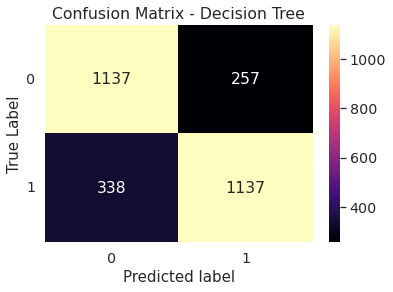

<Figure size 720x504 with 0 Axes>

In [42]:
exp_iterator.confusionMatrix(bestRFC).show()

In [43]:
parameters={'max_depth':[7],
            'random_state':[40],
            'min_samples_leaf':[15]
            } #dictionary with selected parameters to begin the hyperparemeter search
bestDT, accuracyDT=exp_iterator.gridCVHyperparameter(exp_iterator._decisionTreeClassifier, parameters)
bestDT, accuracyDT

(DecisionTreeClassifier(max_depth=7, min_samples_leaf=15, random_state=40),
 0.7742082208751826)

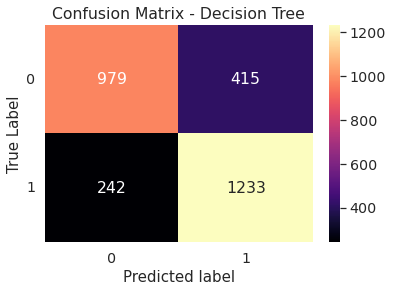

<Figure size 720x504 with 0 Axes>

In [44]:
exp_iterator.confusionMatrix(bestDT).show()